<a href="https://colab.research.google.com/github/hashHanson/CloudComputingClass/blob/master/EDA_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [0]:
from google.colab import files
from zipfile import ZipFile
import os
import io
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot

%matplotlib inline

# Load zipped Files into Colab

In [3]:
lcUploads = files.upload()

Saving metacritic-video-game-comments.zip to metacritic-video-game-comments (1).zip
Saving steam-video-games.zip to steam-video-games (1).zip
Saving vgsaledata.zip to vgsaledata (1).zip
Saving video-game-sales-with-ratings.zip to video-game-sales-with-ratings (1).zip


# Extract csvs from zipfile and save as panda dataframes

In [0]:
def extractCSV(zippedfile):
  csv_files =[]
  df = {}
  
  with ZipFile(zippedfile,'r') as zp:
    csv_files= zp.namelist()
    zp.extractall()
    for f in csv_files:
      f_name = f[:-4]
      vars()['df_'+ str(f_name) ] = pd.read_csv(f)
      df_name= 'df_'+ str(f_name) 
      df[df_name] = vars()['df_'+ str(f_name) ]
  return df

    #csv_files.append(zp.dir())

# Find number of Missing values

In [0]:
def percent_missing(dataframe):
  result ={}
  
  rows = dataframe.shape[0]
  print(f"number rows in Data frame:{rows}")
  for col in dataframe.columns:
    result["Column Name"]= str(col)
    missing_vals = dataframe[col].isnull().sum()
    rows_with_vals = rows - missing_vals
    percent_missing_vals =(missing_vals/rows) * 100

    result["Rows with Values"]= rows_with_vals
    result["Missing values"] = missing_vals
    result["Percentage Missing values"]= percent_missing_vals

    print(result)


# Metacritic data Description

In [0]:
data_1=extractCSV('metacritic-video-game-comments.zip') # you can add other zip file names here

In [0]:
data_1.keys()

dict_keys(['df_metacritic_game_info', 'df_metacritic_game_user_comments'])

In [0]:
#name data frames based on dictionary key values. or you can use any name.
df_metacritic_game_info = data_1["df_metacritic_game_info"] 
df_metacritic_game_user_comments= data_1["df_metacritic_game_user_comments"]

#df_metacritic_game_info.info()
df_metacritic_game_info.describe(include=['object', 'float', 'int'])

df_metacritic_game_info.Title.describe(include=['object', 'float', 'int'])


count              5000
unique             3438
top       Madden NFL 07
freq                  7
Name: Title, dtype: object

In [0]:
df_metacritic_game_info.head(20)

,Unnamed: 0,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player
5,5,Super Mario Galaxy,2007,Nintendo,Action;Platformer;Platformer;3D;3D,Wii,97,9.0,No Online Multiplayer
6,6,Super Mario Galaxy 2,2010,NintendoEADTokyo,Action;Platformer;Platformer;3D;3D,Wii,97,9.1,No Online Multiplayer
7,7,Grand Theft Auto V,2014,RockstarNorth,Action Adventure;Modern;Open-World,XboxOne,97,7.8,Up to 30
8,8,Grand Theft Auto V,2013,RockstarNorth,Modern;Action Adventure;Modern;Open-World,PlayStation3,97,8.3,Up to 16
9,9,Grand Theft Auto V,2013,RockstarNorth,Modern;Action Adventure;Modern;Open-World,Xbox360,97,8.3,Up to 16


In [0]:
percent_missing(df_metacritic_game_info)

number rows in Data frame:5000
{'Column Name': 'Unnamed: 0', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Title', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Year', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Publisher', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Genre', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Platform', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Metascore', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Avg_Userscore', 'Rows with Values': 5000, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'No_Players', 'Rows with Values': 4993, 'Missing values': 7, 'Percentage Missing v

### Metacritic Comments

In [0]:
# Metacritic Comments

df_metacritic_game_user_comments = data_1["df_metacritic_game_user_comments"]
df_metacritic_game_user_comments.describe(include=['object', 'float', 'int'])

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
count,283983.000000,283983,283983,283983.000000,283960,283980
unique,NaN,2325,20,NaN,277706,133664
top,NaN,Call of Duty: Modern Warfare 3,PC,NaN,NO DiretideNO New HeroNO UpdatesNO Normal matc...,AnonymousMC
freq,NaN,5844,118936,NaN,83,914
mean,141991.000000,NaN,NaN,7.618308,NaN,NaN
std,81978.975085,NaN,NaN,3.131767,NaN,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,70995.500000,NaN,NaN,7.000000,NaN,NaN
50%,141991.000000,NaN,NaN,9.000000,NaN,NaN
75%,212986.500000,NaN,NaN,10.000000,NaN,NaN


In [0]:
percent_missing(df_metacritic_game_user_comments)

number rows in Data frame:283983
{'Column Name': 'Unnamed: 0', 'Rows with Values': 283983, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Title', 'Rows with Values': 283983, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Platform', 'Rows with Values': 283983, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Userscore', 'Rows with Values': 283983, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Comment', 'Rows with Values': 283960, 'Missing values': 23, 'Percentage Missing values': 0.008099076353161986}
{'Column Name': 'Username', 'Rows with Values': 283980, 'Missing values': 3, 'Percentage Missing values': 0.001056401263455911}


# Vgsalesdata Data Description

In [7]:
data_2 = extractCSV("vgsaledata.zip")
data_2.keys()

dict_keys(['df_vgscore'])

In [178]:
df_vgscore = data_2["df_vgscore"]

df_vgscore.describe()

,title,user_Score,release_Date,console,url,publisher,developer,tot_ship,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore,release_year,name,Name
count,53049,53049,53049,53049,53049,53049,53049,1559,19305,12944,13139,6989,15460,8312,53049,53049,53049,53049
unique,35705,51,7264,73,53049,3146,7504,443,510,336,267,131,138,427,62,47,35705,35532
top,Plants vs. Zombies,N/A,1994-01-01 00:00:00,PC,http://www.vgchartz.com/game/224072/alvastia-c...,Sega,Unknown,0.12m,0.01m,0.01m,0.00m,0.01m,0.00m,22nd Sep 18,N/A,2009,Plants vs. Zombies,Plants vs. Zombies
freq,20,52713,507,9905,1,2084,4479,72,1364,658,2249,1140,5193,148,52291,4303,20,20
first,NaN,NaN,1970-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
percent_missing(df_vgscore)

number rows in Data frame:55864
{'Column Name': 'title', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'user_Score', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'release_Date', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'console', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'url', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'publisher', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'developer', 'Rows with Values': 55864, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'tot_ship', 'Rows with Values': 1966, 'Missing values': 53898, 'Percentage Missing values': 96.48073893741945}
{'Column Name': 'tot_sale', 'Rows with Values': 19409, 'Missing values':

### vgsalesdata:  

*   handle missing values for columns of interest
*   create release year from release_Date field







In [0]:
 # Missing values for release date will be filled with last_update date. This will at-least get us close to the decade in which game was release
df_vgscore.release_Date = df_vgscore[['release_Date','last_update']].apply(lambda x: x['last_update'] if x['release_Date'] == "N/A" else x['release_Date'], axis=1)

df_vgscore.release_Date.dropna()
df_vgscore[df_vgscore["release_Date"]=="N/A"] # Check if all N/As have been replaced.
df_vgscore["Platform"]= df_vgscore.console


In [187]:
 # create release_year. Release year and game title will be used to join to the video-games_sales-with-rating data to add columns and values from vgsales to the games sales data
df_vgscore.release_Date = pd.to_datetime(df_vgscore.release_Date, errors="coerce")
df_vgscore["release_year"]= df_vgscore.release_Date.dt.year
 
df_vgscore.dropna(subset=["release_year"], inplace=True)
df_vgscore[df_vgscore.release_year.isnull()]


,title,user_Score,release_Date,console,url,publisher,developer,tot_ship,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore,release_year,name,Name,Platform


In [186]:
#df_vgscore.release_year=df_vgscore.release_year.round(0)
#df_vgscore["Name"] = df_vgscore.title
df_vgscore.head(5)

,title,user_Score,release_Date,console,url,publisher,developer,tot_ship,tot_sale,na_sale,pal_sale,jp_sale,other_sale,last_update,VGscore,release_year,name,Name,Platform
0,Wii Sports,N/A,2006-11-19,Wii,http://www.vgchartz.com/game/2667/wii-sports/?...,Nintendo,Nintendo EAD,82.87m,NaN,NaN,NaN,NaN,NaN,NaN,N/A,2006,Wii Sports,Wii Sports,Wii
1,Super Mario Bros.,8.2,1985-10-18,NES,http://www.vgchartz.com/game/6455/super-mario-...,Nintendo,Nintendo EAD,40.24m,NaN,NaN,NaN,NaN,NaN,NaN,N/A,1985,Super Mario Bros.,Super Mario Bros.,NES
2,Mario Kart Wii,9.1,2008-04-27,Wii,http://www.vgchartz.com/game/6968/mario-kart-w...,Nintendo,Nintendo EAD,37.20m,NaN,NaN,NaN,NaN,NaN,11th Apr 18,8.7,2008,Mario Kart Wii,Mario Kart Wii,Wii
3,PlayerUnknown's Battlegrounds,N/A,2017-12-21,PC,http://www.vgchartz.com/game/215988/playerunkn...,PUBG Corporation,PUBG Corporation,36.60m,NaN,NaN,NaN,NaN,NaN,13th Nov 18,N/A,2017,PlayerUnknown's Battlegrounds,PlayerUnknown's Battlegrounds,PC
4,Wii Sports Resort,8.8,2009-07-26,Wii,http://www.vgchartz.com/game/24656/wii-sports-...,Nintendo,Nintendo EAD,33.10m,NaN,NaN,NaN,NaN,NaN,NaN,8.8,2009,Wii Sports Resort,Wii Sports Resort,Wii


In [0]:
# changing columns to used in join to str
df_vgscore.Name = df_vgscore.Name.astype(str).str.strip()
df_vgscore.release_year = df_vgscore.release_year.astype(str).str.strip()
df_vgscore.Platform = df_vgscore.Platform.astype(str).str.strip()

In [161]:
df_vgscore.release_year.describe()

count     53049
unique       47
top        2009
freq       4303
Name: release_year, dtype: object

# Video-game-sales-with-ratings Data Description

In [147]:
data_3 = extractCSV("video-game-sales-with-ratings.zip")
data_3.keys()

dict_keys(['df_Video_Games_Sales_as_at_22_Dec_2016'])

In [0]:
df_Video_Games_Sales_with_rating = data_3["df_Video_Games_Sales_as_at_22_Dec_2016"]
df_Video_Games_Sales_with_rating.describe(include=['object', 'float', 'int'])

In [63]:
percent_missing(df_Video_Games_Sales_with_rating)

number rows in Data frame:16719
{'Column Name': 'Name', 'Rows with Values': 16717, 'Missing values': 2, 'Percentage Missing values': 0.011962437944853162}
{'Column Name': 'Platform', 'Rows with Values': 16719, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Year_of_Release', 'Rows with Values': 16450, 'Missing values': 269, 'Percentage Missing values': 1.60894790358275}
{'Column Name': 'Genre', 'Rows with Values': 16717, 'Missing values': 2, 'Percentage Missing values': 0.011962437944853162}
{'Column Name': 'Publisher', 'Rows with Values': 16665, 'Missing values': 54, 'Percentage Missing values': 0.32298582451103536}
{'Column Name': 'NA_Sales', 'Rows with Values': 16719, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'EU_Sales', 'Rows with Values': 16719, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'JP_Sales', 'Rows with Values': 16719, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Othe

In [0]:
 # Exclude games before year 2000 

df_Video_Games_Sales_with_rating = df_Video_Games_Sales_with_rating[(df_Video_Games_Sales_with_rating["Year_of_Release"] >= 2000)]
df_Video_Games_Sales_with_rating.Year_of_Release = df_Video_Games_Sales_with_rating.Year_of_Release.astype('uint16')
df_Video_Games_Sales_with_rating.rename(columns={"Year_of_Release":"release_year"},inplace=True)
df_Video_Games_Sales_with_rating.release_year.min()



In [193]:
# changing columns to used in join to str
df_Video_Games_Sales_with_rating.Name = df_Video_Games_Sales_with_rating.Name.astype(str).str.strip()
df_Video_Games_Sales_with_rating.release_year = df_Video_Games_Sales_with_rating.release_year.astype(str).str.strip()
df_Video_Games_Sales_with_rating.Platform = df_Video_Games_Sales_with_rating.Platform.astype(str).str.strip()
df_Video_Games_Sales_with_rating.release_year.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count     14474
unique       19
top        2008
freq       1427
Name: release_year, dtype: object

# Merge Video Game Sales Datasets

In [0]:
# add columns  and cell values to df_Video_Games_Sales_with_rating using vgsales dataframe.
df_vgscore_nodups = df_vgscore[['release_Date','tot_ship','Name','release_year','Platform']].drop_duplicates()
df_merged_video_game_sales = pd.merge(df_Video_Games_Sales_with_rating, df_vgscore_nodups,on=['Name','release_year','Platform'], how='left',)

#del df_merged_video_game_sales

df_merged_video_game_sales[df_merged_video_game_sales.release_Date.notnull()]
df_merged_video_game_sales.drop_duplicates()
df_merged_video_game_sales.to_csv("merged-video-game-sales.csv")

In [110]:
df_Video_Games_Sales_with_rating.release_year.describe()

count    14474.000000
mean      2008.025010
std          4.113828
min       2000.000000
25%       2005.000000
50%       2008.000000
75%       2011.000000
max       2020.000000
Name: release_year, dtype: float64

In [203]:
percent_missing(df_merged_video_game_sales)

number rows in Data frame:14489
{'Column Name': 'Name', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Platform', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'release_year', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Genre', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Publisher', 'Rows with Values': 14457, 'Missing values': 32, 'Percentage Missing values': 0.22085720201532197}
{'Column Name': 'NA_Sales', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'EU_Sales', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'JP_Sales', 'Rows with Values': 14489, 'Missing values': 0, 'Percentage Missing values': 0.0}
{'Column Name': 'Other_Sales', 'Rows with Values': 14489, 'Missing values

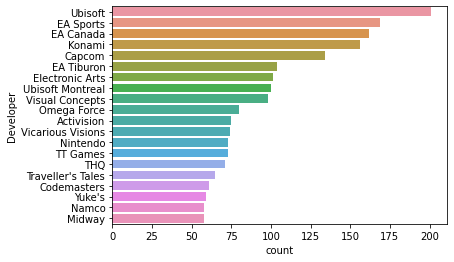

In [211]:
## Plot Top 20 Developers and their count
sns.countplot(y= "Developer", data=df_merged_video_game_sales, order= df_merged_video_game_sales["Developer"].value_counts()[:20].index )

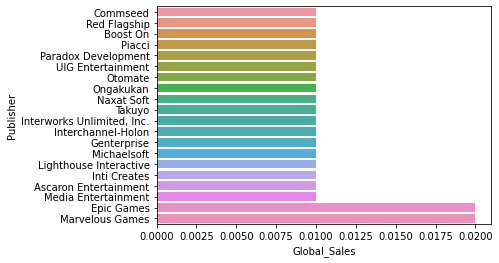

In [228]:
## Plot Top 20 Publishers and their count
df_publisher_gl_sales =df_merged_video_game_sales.groupby(["Publisher"])["Global_Sales"].aggregate(np.sum).reset_index().sort_values("Global_Sales")[:20]
sns.barplot(y= "Publisher", x= "Global_Sales", data=df_publisher_gl_sales, order= df_publisher_gl_sales["Publisher"])

### create categorical fields for Merged Data set based on top 5 publishers and all others as "other_publishers"

In [0]:
#df_merged_video_game_sales["Is_Electronic_Arts"] = df_merged_video_game_sales.Publisher.apply(lambda x: 1 if x=='Electronic Arts' else 0)
df_merged_video_game_sales["Is_Activision"] = df_merged_video_game_sales.Publisher.apply(lambda x: 1 if x=='Activision' else 0)
df_merged_video_game_sales["Is_Namco"] = df_merged_video_game_sales.Publisher.apply(lambda x: 1 if x=='Namco Bandai Games' else 0)
df_merged_video_game_sales["Is_Konami"] = df_merged_video_game_sales.Publisher.apply(lambda x: 1 if x=='Activision' else 0)